In [168]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

In [169]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')

In [170]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [172]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2})

train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [174]:
test_df['Embarked'].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [175]:
test_df['Ticket'].value_counts()

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [176]:
test_df = test_df.drop(columns='Ticket')

train_df = train_df.drop(columns='Ticket')

In [177]:
test_df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [178]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})

In [179]:
test_df = test_df.drop(columns='Name')

train_df = train_df.drop(columns='Name')

In [180]:
test_df['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [181]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [182]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [183]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [184]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [186]:
cabina = train_df.groupby(train_df['Cabin'].isnull())

In [187]:
train_df['Cabin_available'] = np.where(train_df['Cabin'].isnull(), 0,1)

test_df['Cabin_available'] = np.where(test_df['Cabin'].isnull(), 0,1)

In [188]:
train_df['Cabin_available'].value_counts()

Cabin_available
0    687
1    204
Name: count, dtype: int64

In [189]:
train_df['Embarked'].replace(np.nan, 0, inplace = True)

test_df['Embarked'].replace(np.nan, 0, inplace = True)

In [190]:
test_df.isnull().sum()

PassengerId          0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 1
Cabin              327
Embarked             0
Cabin_available      0
dtype: int64

In [191]:
test_df = test_df.drop(columns='Cabin')

train_df = train_df.drop(columns='Cabin')

In [192]:
test_df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [193]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [194]:
test_df.drop_duplicates(ignore_index=True, inplace=True)
train_df.drop_duplicates(ignore_index=True, inplace=True)

In [195]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    int64  
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    float64
 9   Cabin_available  891 non-null    int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 66.3 KB


<Axes: >

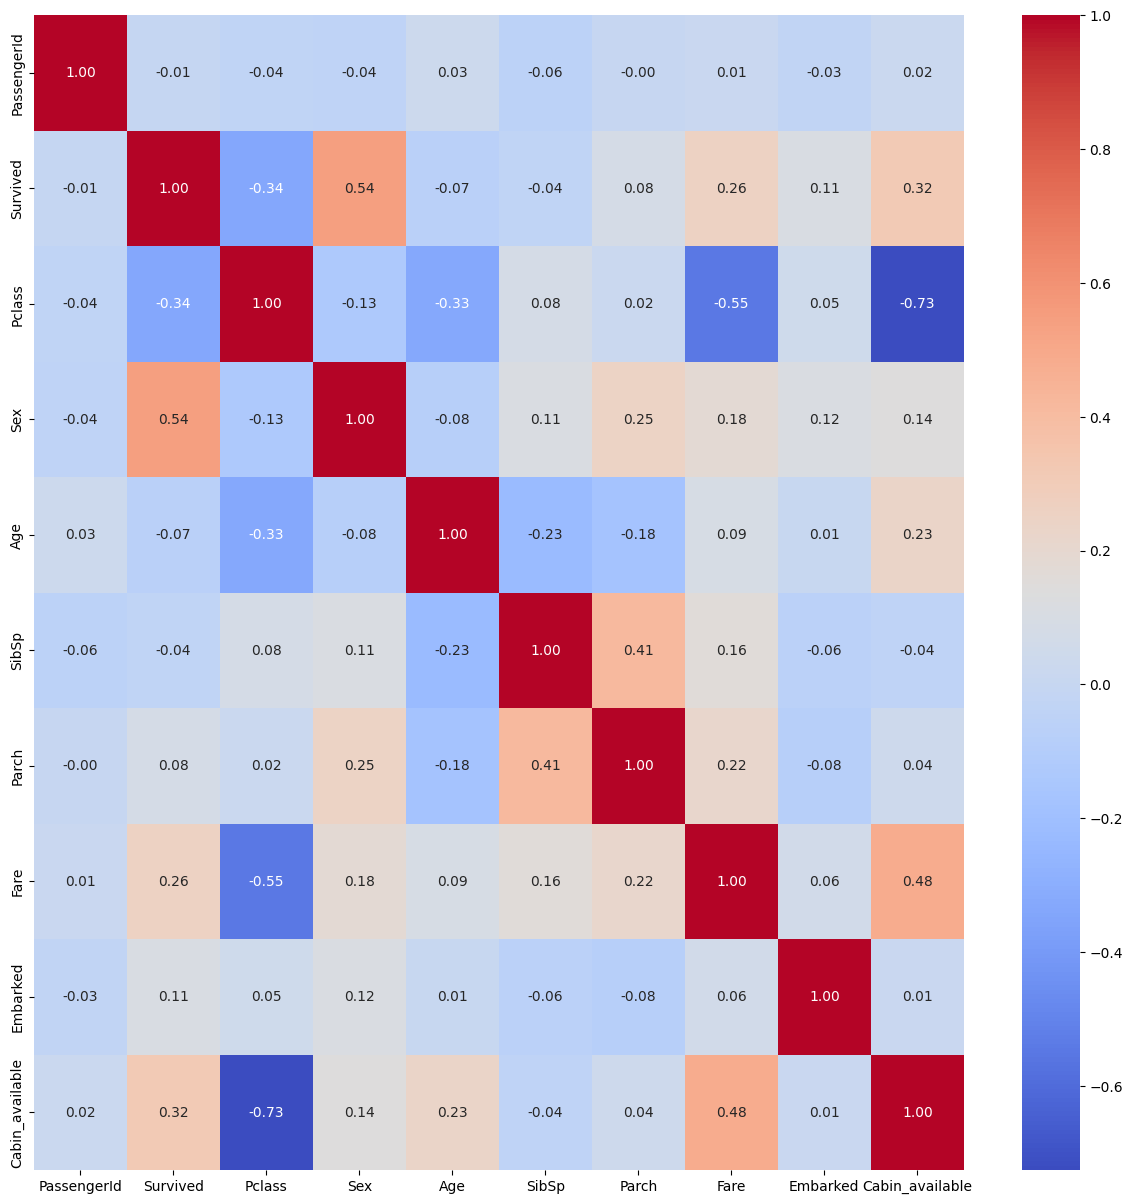

In [196]:

corr = train_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

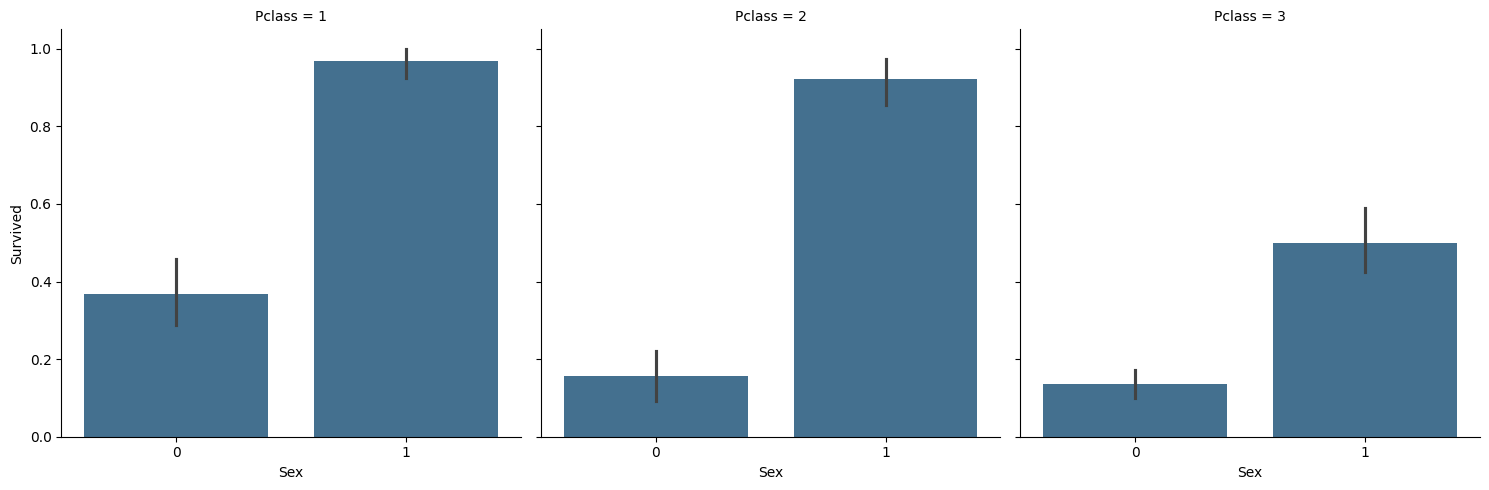

In [197]:
sns.catplot(data = train_df,y='Survived',x='Sex',col='Pclass', kind='bar', saturation=0.5)

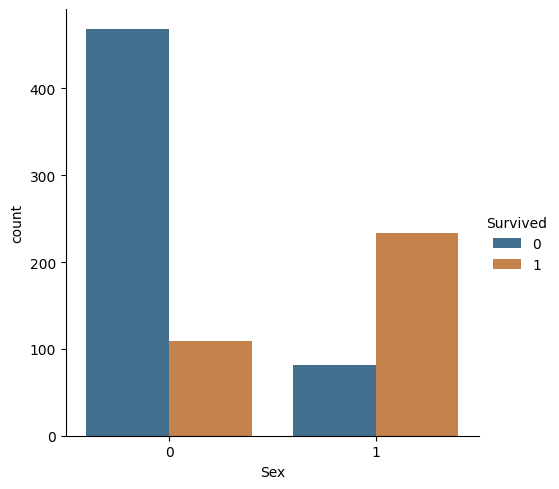

In [198]:
sns.catplot(data = train_df,hue = 'Survived', x = 'Sex', kind='count', saturation=0.5)

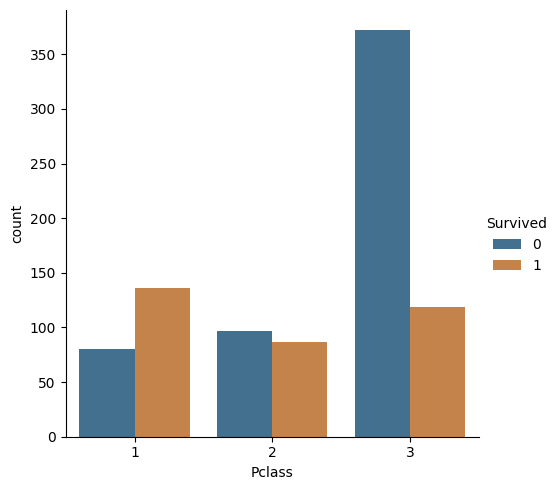

In [199]:
sns.catplot(data = train_df,hue = 'Survived', x = 'Pclass', kind='count', saturation=0.5)

In [200]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_available
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,0


In [202]:
X_train = train_df.drop(['Survived', 'PassengerId'], axis=1)
y_train = train_df['Survived']

X_test = test_df.drop(['PassengerId'], axis=1)

In [203]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [204]:
transformer_train = Normalizer().fit(X_train)

transformer_test = Normalizer().fit(X_test)

In [205]:
X_train = transformer_train.transform(X_train)

X_test = transformer_test.transform(X_test)

In [206]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_log_reg = logistic_regression_model.predict(X_test)
acc_log_reg = round(logistic_regression_model.score(X_train, y_train)*100, 2)
print(str(acc_log_reg) + '%')

69.47%


In [207]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
acc_decision_tree = round(decision_tree_model.score(X_train, y_train)*100, 2)
print(str(acc_decision_tree))

98.65


In [208]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
acc_random_forest = round(random_forest_model.score(X_train, y_train)*100, 2)
print(str(acc_random_forest))

98.65


In [211]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_log_reg})
submission.to_csv('submission.csv', index=False)